# **菊安酱和菜菜的python机器学习可视化**

## <font color='bule'>第2期 偏差图：10发散条形图 & 11发散型文本

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

#### **菊安酱所使用的版本**：

In [2]:
import matplotlib as mpl
import seaborn as sns
import sys
print(sns.__version__)    #0.9.0
print(mpl.__version__)    #3.0.2

#Python版本
sys.version               #3.7.1

0.11.0
3.3.2


'3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]'

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## <font color='bule' >第二章 偏差图 deviation </font>

偏差图是单个特征中的所有值与特定值之间的关系图，它反映的是所有值偏离特定值的距离   
典型的偏差图有：发散型条形图，面积图，……    

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/%E5%81%8F%E5%B7%AE%E5%9B%BE.png'>

### **我们什么时候需要偏差图呢？**


1. 数据探索 & 数据解读：  
> 探索某一特征的分布，探索该特征偏离某个特定值（均值、方差等）的程度   

2. 结果展示 & 报告呈现：   
> 直观展示某个特征的分布状况，快速得出结论  


### <font color='blue' > 10/50 发散条形图（Diverging Bars） </font>

如果你想根据单个指标查看项目的变化情况，并可视化此差异的顺序和数量，那么发散条形图是一个很好的工具。    
它有助于快速区分数据中的组的性能，并且非常直观，可以立即传达这一点。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/%E5%8F%91%E6%95%A3%E5%9E%8B%E6%9D%A1%E5%BD%A2%E5%9B%BE.png' height='500' width='700'>

- 横坐标：里程
- 纵坐标：各品牌汽车
- 颜色：＜0显示红色，＞0显示绿色

### **我们的目标就是绘制出这张图，并且利用现有数据解读图内信息**

### 1. 导入需要的绘图库

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

### 2.先来认识一下绘制发散型条形图的函数
#### **plt.hlines()**

plt.hlines()表示水平的条形图，类似的还有垂直的条形图plt.vlines()    

参数说明：    
y: y轴索引    
xmin: 每行的开头    
xmax: 每行的结尾   
colors: 颜色，默认是‘k’(黑色)    
linestyles : 线的类型，可选择{'solid', 'dashed', 'dashdot', 'dotted'}  
label: 标签，默认为空   

*linewidth：线的宽度       
*alpha：色彩饱和度

In [4]:
plt.hlines?

Signature:
plt.hlines(
    y,
    xmin,
    xmax,
    colors=None,
    linestyles='solid',
    label='',
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot horizontal lines at each *y* from *xmin* to *xmax*.

Parameters
----------
y : float or array-like
    y-indexes where to plot the lines.

xmin, xmax : float or array-like
    Respective beginning and end of each line. If scalars are
    provided, all lines will have same length.

colors : list of colors, default: :rc:`lines.color`

linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, optional

label : str, default: ''

Returns
-------
`~matplotlib.collections.LineCollection`

Other Parameters
----------------
**kwargs :  `~matplotlib.collections.LineCollection` properties.

See Also
--------
vlines : vertical lines
axhline: horizontal line across the axes

Notes
-----


.. note::
    In addition to the above described arguments, this function can take
    a *data* keyword argument. If such a *data* argument is given,
    the f

#### 绘制一个超级简单的条形图

In [5]:
#定义数据
x = np.random.rand(10) #随机生成10个[0,1)的数字

In [6]:
x

array([0.67093807, 0.13711492, 0.22674342, 0.74006448, 0.15208532,
       0.09570882, 0.47276882, 0.7744472 , 0.59216373, 0.09244731])

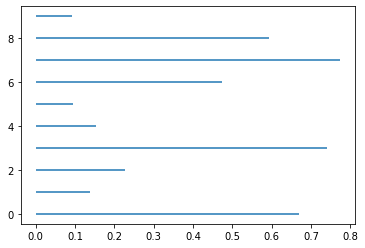

In [7]:
#绘图
plt.hlines(y=range(10),xmin=0,xmax=x);

### **与我们的目标图像相比，你发现了什么？**
- 目标图像是从大到小顺序排列的
- 目标图像的线比较宽
- 目标图像是基于某个特定值将数据分为了两部分，并用不同颜色表示

**(1)让图像顺序排列**

In [8]:
#定义数据
x = np.random.rand(10) #随机生成10个[0,1)的数字

In [9]:
x

array([0.3881096 , 0.38611313, 0.85096218, 0.22507903, 0.90454413,
       0.27245502, 0.78923926, 0.40606742, 0.42641585, 0.15839857])

方法一：

In [10]:
a = sorted(x,reverse=True) #默认从小到大排列，reverse=True可以实现从大到小的排列,不会改变原数据的顺序

In [11]:
a

[0.9045441263330077,
 0.8509621825172852,
 0.7892392644451205,
 0.4264158527125147,
 0.40606741661156975,
 0.38810959817975077,
 0.3861131266761242,
 0.27245501764936997,
 0.2250790267446352,
 0.1583985742131505]

In [12]:
x

array([0.3881096 , 0.38611313, 0.85096218, 0.22507903, 0.90454413,
       0.27245502, 0.78923926, 0.40606742, 0.42641585, 0.15839857])

方法二：

In [13]:
x.sort() #从小到大排列，并且会直接改变原数据

In [14]:
x

array([0.15839857, 0.22507903, 0.27245502, 0.38611313, 0.3881096 ,
       0.40606742, 0.42641585, 0.78923926, 0.85096218, 0.90454413])

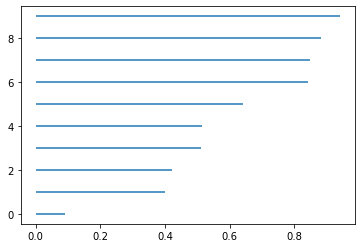

In [15]:
#定义数据
x = np.random.rand(10)

#对数据进行排序
x.sort()
#x = sorted(x,reverse=False)

#绘图
plt.hlines(y=range(10),xmin=0,xmax=x);

<font color='bule'>【注意】plt.hlines()的图像是从下往上依次画出的，.sort()返回的结果是从小到大排列，与图像从下往上的顺序吻合

**(2)让图像的线变宽一点**

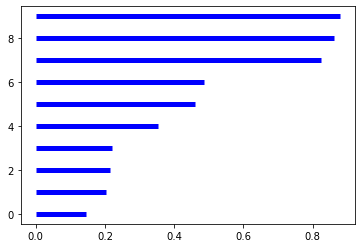

In [16]:
#定义数据
x = np.random.rand(10)
x.sort()
#x = sorted(x,reverse=False)

#绘图
plt.hlines(y=range(10),xmin=0,xmax=x
          ,linewidth=5
          ,color='b'
          );

**(3)让图像基于均值分成两部分**

In [17]:
#定义数据
x = np.random.rand(10)
x = x-x.mean() #均值变为0
x.sort()

In [18]:
x

array([-0.34315029, -0.32910427, -0.26803626, -0.13528971, -0.08362162,
       -0.06541543,  0.07891994,  0.12828368,  0.46568183,  0.55173213])

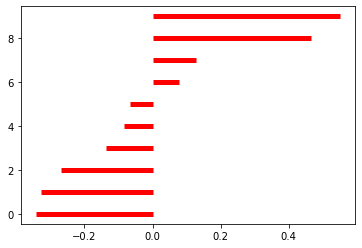

In [19]:
#绘图
plt.hlines(y=range(10),xmin=0,xmax=x
          ,linewidth=5
          ,color='red');

**(4)让两部分显示不同的颜色**

直接让颜色color = ['red','green'] 可行吗？

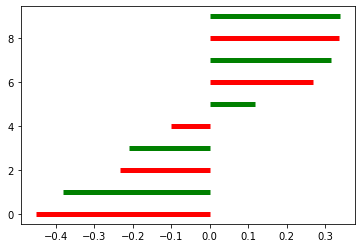

In [20]:
#定义数据
x = np.random.rand(10)
x = x-x.mean()
x.sort()

#绘图
plt.hlines(y=range(10),xmin=0,xmax=x
          ,linewidth=5
          ,color=['red','green']);

In [21]:
x

array([-0.45221789, -0.38184759, -0.23258407, -0.20960998, -0.10058962,
        0.11841493,  0.26868912,  0.31479822,  0.33650493,  0.33844195])

In [22]:
#创建颜色列表
colors = []
for i in x:
    if i<0:
        colors.append('red')
    else:
        colors.append('green')

In [23]:
colors

['red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green']

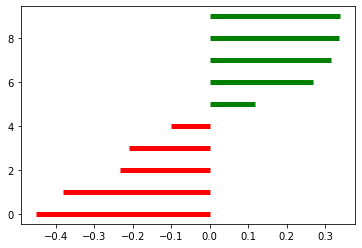

In [24]:
#绘图
plt.hlines(y=range(10),xmin=0,xmax=x
          ,linewidth=5
          ,color=colors);

In [25]:
#color参数用列表推导式写
['red' if i<0 else 'green' for i in x]

['red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green']

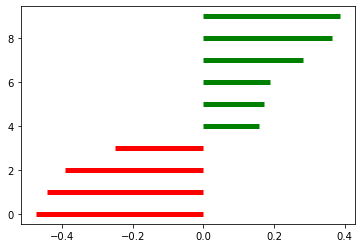

In [27]:
#定义数据
x = np.random.rand(10)
x = x-x.mean()
x.sort()

#绘图
plt.hlines(y=range(10),xmin=0,xmax=x
          ,linewidth=5
          ,color=['red' if i<0 else 'green' for i in x]
          );

**(5)让颜色变浅一点**   
参数alpha是颜色饱和度，默认值为1     
alpha取值范围是[0,1],越接近1颜色越饱和，也就是颜色越艳丽

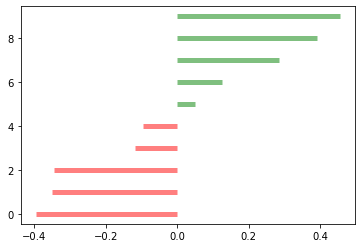

In [31]:
#定义数据
x = np.random.rand(10)
x = x-x.mean()
x.sort()

#绘图
plt.hlines(y=range(10),xmin=0,xmax=x
          ,linewidth=5
          ,color=['red' if i<0 else 'green' for i in x]
          ,alpha=0.5
          );

#### 到这里为止，绘制发散型条形图的基本知识点你已经掌握啦~~~

### 3. 认识绘图所需的数据集

In [37]:
#导入数据
df = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mtcars.csv")

In [38]:
#探索数据
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [39]:
df.shape

(32, 14)

In [40]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout
5,4.254409,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1,Valiant,Valiant
6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360
7,4.939636,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,Merc 240D,Merc 240D
8,4.774935,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,Merc 230,Merc 230
9,4.381780,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1,Merc 280,Merc 280


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mpg      32 non-null     float64
 1   cyl      32 non-null     int64  
 2   disp     32 non-null     float64
 3   hp       32 non-null     int64  
 4   drat     32 non-null     float64
 5   wt       32 non-null     float64
 6   qsec     32 non-null     float64
 7   vs       32 non-null     int64  
 8   am       32 non-null     int64  
 9   gear     32 non-null     int64  
 10  carb     32 non-null     int64  
 11  fast     32 non-null     int64  
 12  cars     32 non-null     object 
 13  carname  32 non-null     object 
dtypes: float64(5), int64(7), object(2)
memory usage: 3.6+ KB


In [42]:
df.cars==df.carname

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
dtype: bool

In [43]:
#判断特征cars与carname的区别
sum(df.cars==df.carname)

32

In [44]:
sum(df.cars!=df.carname)

0

In [45]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb', 'fast', 'cars', 'carname'],
      dtype='object')

In [47]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


所用数据集mtcars 记录了32种不同品牌的轿车的14个属性，如下所示：

> mpg：英里每加仑（Miles per gallon）  值越大性能越好，或许是能源利用效率更高，或许速度较快   
> cyl：气缸数量（Number of cylinders）   
> disp：排量（Displacement）   
> hp：总马力（horsepower）   
> drat：驱动轴比（drive axle ratio）   
> wt：重量（Weight (lb/1000)）    
> qsec：1/4英里所用时间（quarter mile time(secend)）    
> vs：引擎（0-V shape，1-straight）     
> am：变速器（Transmission，0-automatic,1-manual）    
> gear：前进档数（Number of forward gears）  #除了倒挡之外还有几个档    
> carb：化油器数量（Number of carburetors）  #内燃机中用于混合空气和液体燃料的精细喷雾的装置。    
> fast: 用油是否高效（mpg>4 即为1，反之为0）   
> cars：汽车名称    
> carname：汽车名称（与cars完全相同）

#### 大家找到我们绘制目标图所需的特征了嘛？
>横坐标mileage指的是里程，所以可以推断所需要的特征就是mpg(消耗每加仑油跑多少英里)    
>纵坐标model指的是汽车的种类，所以我们直接用汽车名称cars或者caname都可以

In [50]:
#横坐标
df.mpg.values

array([4.58257569, 4.58257569, 4.77493455, 4.6260134 , 4.32434966,
       4.25440948, 3.78153408, 4.93963561, 4.77493455, 4.38178046,
       4.21900462, 4.04969135, 4.15932687, 3.89871774, 3.2249031 ,
       3.2249031 , 3.8340579 , 5.69209979, 5.5136195 , 5.82237065,
       4.63680925, 3.93700394, 3.89871774, 3.64691651, 4.38178046,
       5.22494019, 5.09901951, 5.5136195 , 3.97492138, 4.4384682 ,
       3.87298335, 4.6260134 ])

In [51]:
#纵坐标
df.cars.values

array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
       'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
       'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
       'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
       'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
       'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
       'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype=object)

### 4. 绘制基础图形

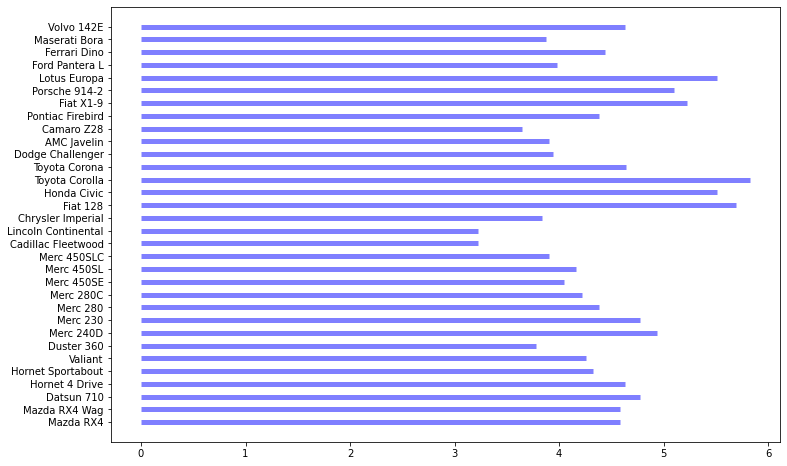

In [52]:
#添加画布，设置画布大小
plt.figure(figsize=(12,8))

#绘图
plt.hlines(y=df.cars, xmin=0, xmax=df.mpg
          ,color='b'
          ,alpha=0.5
          ,linewidth=5);

从这张图中，能看出的信息很少：   
- 每种汽车的里程数    
- 不同种类汽车里程数的相对大小

### 5. 对目标数据进行格式变换

#### 5.1 提取目标数据并进行标准化处理

In [53]:
#提取出mpg这一列所有的数据
x = df.loc[:,'mpg']

In [54]:
x

0     4.582576
1     4.582576
2     4.774935
3     4.626013
4     4.324350
5     4.254409
6     3.781534
7     4.939636
8     4.774935
9     4.381780
10    4.219005
11    4.049691
12    4.159327
13    3.898718
14    3.224903
15    3.224903
16    3.834058
17    5.692100
18    5.513620
19    5.822371
20    4.636809
21    3.937004
22    3.898718
23    3.646917
24    4.381780
25    5.224940
26    5.099020
27    5.513620
28    3.974921
29    4.438468
30    3.872983
31    4.626013
Name: mpg, dtype: float64

In [55]:
#对目标数据进行标准化处理
#这里采用的是z-score标准化
#只是将原始数据进行了线性变换，并没有改变一个数据在该数据集中的位置
#也没有改变该组数据的分布，而只是将均值变为0，标准差变为1
df['mpg_z'] = (x - x.mean())/x.std()

In [56]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4,0.223563
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag,0.223563
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710,0.514515
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive,0.289265
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout,-0.167015


In [57]:
df['mpg_z'].values

array([ 0.22356336,  0.22356336,  0.51451502,  0.2892649 , -0.16701545,
       -0.27280321, -0.98804909,  0.76363298,  0.51451502, -0.08014871,
       -0.32635469, -0.58244884, -0.41662005, -0.8108034 , -1.82997917,
       -1.82997917, -0.90860438,  1.9017698 ,  1.63181012,  2.0988105 ,
        0.30559411, -0.75289375, -0.8108034 , -1.19166439, -0.08014871,
        1.19516933,  1.00470849,  1.63181012, -0.69554186,  0.00559412,
       -0.84972785,  0.2892649 ])

#### 5.2 生成颜色标签

In [58]:
color=[]
for i in df['mpg_z']:
    if i>0:
        color.append('green')
    else:
        color.append('red')

In [59]:
print(color)

['green', 'green', 'green', 'green', 'red', 'red', 'red', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'red', 'green', 'red', 'green']


In [60]:
print(['green' if i>0 else 'red' for i in df['mpg_z']])

['green', 'green', 'green', 'green', 'red', 'red', 'red', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'red', 'green', 'red', 'green']


In [61]:
#根据标准化后的数据mpg_z,将数据分类（正数为绿色，负数为红色）
#这里直接使用列表推导式
df['colors'] = ['green' if i>0 else 'red' for i in df['mpg_z']]

In [62]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4,0.223563,green
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag,0.223563,green
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710,0.514515,green
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive,0.289265,green
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout,-0.167015,red


In [63]:
df['colors'].value_counts()

red      17
green    15
Name: colors, dtype: int64

#### 5.3 对数据集进行排序

In [64]:
#原数据是无序排列的，我们需要对数据进行排序
#这里需要注意的是，我们不止要对x进行排序，还需要确保y索引跟着一起变化
#所以我们应该对整个数据集进行排序
df.sort_values('mpg_z',inplace=True)

In [65]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


In [66]:
#排序之后索引也会跟着一起打乱
#需要重置索引
df.reset_index(drop=True,inplace=True) #drop参数是不要增加新的索引

In [67]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


### 6. 绘制目标图形

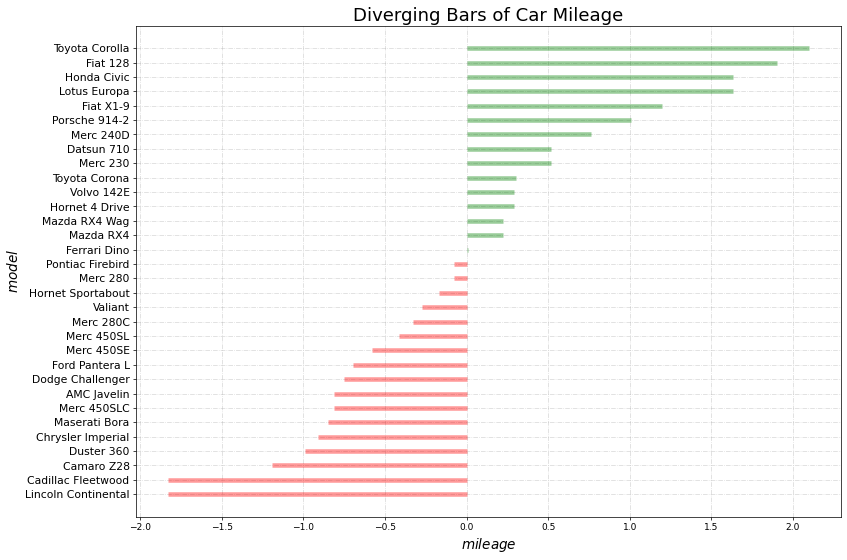

In [70]:
#创建画布
plt.figure(figsize=(14,10), dpi=65)

#绘制基础图形
plt.hlines(y=df.cars, xmin=0, xmax=df.mpg_z
           ,color=df.colors
           ,alpha=0.4
           ,linewidth=5); #;可以阻止生成器对象的生成

#添加装饰
plt.ylabel('$model$',fontsize=15)   #设置y轴标签，fontsize调节文字大小
plt.xlabel('$mileage$',fontsize=15) #设置x轴标签，fontsize调节文字大小
plt.yticks(fontsize=12)         #y轴刻度标签
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20,'color':'k'}) #设置图形标题
plt.grid(linestyle='-.', alpha=0.5);  #配置网格线

**原图形代码**

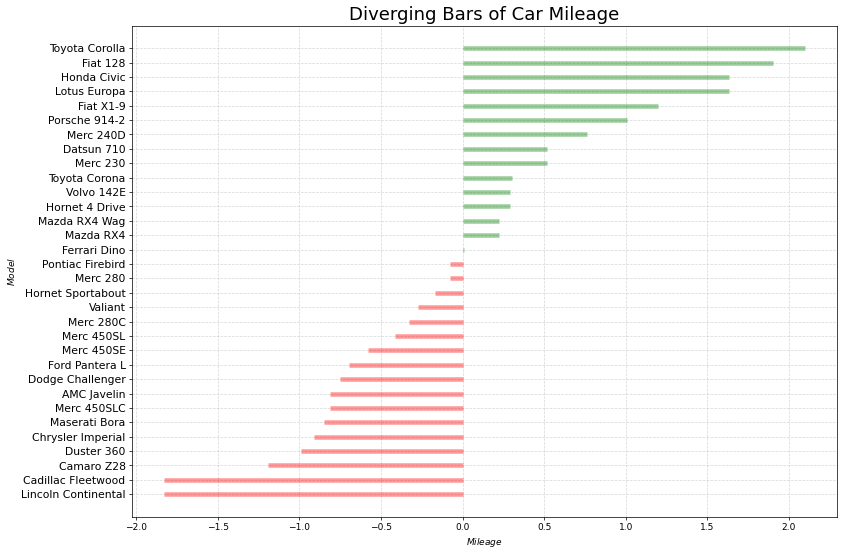

In [71]:
#下面这一整段代码为原始代码

# Prepare Data
df = pd.read_csv("D:\python数据处理——数据\橘安酱和菜菜的可视化全集\data\mtcars.csv")  #导入数据集
x = df.loc[:, ['mpg']]   #提取目标数据
df['mpg_z'] = (x - x.mean())/x.std()  #对目标数据进行z-score标准化处理
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']] #生成颜色标签列
df.sort_values('mpg_z', inplace=True) #根据标准化后的数据对整个数据集进行排序
df.reset_index(inplace=True) #重置数据集的索引（这里是新增加了一列索引）

# Draw plot
plt.figure(figsize=(14,10), dpi=65) #创建画布并设置画布大小
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)#绘制基础图形

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$') #get current axes,获取当前子图，若果没有子图则创建一个子图，并设置横纵轴名称
plt.yticks(df.index, df.cars, fontsize=12)  #将y轴刻度标签修改为汽车名称，并设置字体大小
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20}) #添加图标标题，并设置标题字体大小
plt.grid(linestyle='--', alpha=0.5) #配置网格线
plt.show() #本地显示图像

### 7. 图形解读

#### （1）相同油耗内里程数最小的是林肯大陆 （Lincoln Continental）
> 这款车一开始是福特汽车公司总裁Edsel Ford的私人车辆     
> 从1939年至今已经更新十代   
> 林肯系列车走的是高端路线，油耗里程已经不再是它关注的重点    

#### （2）位于均值线上的是法拉利迪诺（Ferrari Dino）
> “Dino”品牌的诞生是为了推出一款价格较低，“价格合理”的跑车     
> “Dino”这个名字是为了纪念这位创始人已故的儿子Alfredo“Dino”Ferrari，他因设计用于汽车的V6发动机而受到赞誉   

#### （3）油耗里程数最大的是丰田卡罗拉（Toyota Corolla）
> 这是丰田生产的一系列超小型和紧凑型轿车    
> 从1966年至今，已经更新十二代   
> 卡罗拉于1966年推出，是1974年全球最畅销的汽车，自那时起成为全球最畅销的汽车之一    

#### （4）从图形上来看，这32款汽车根据相同油耗内的里程数被分成了两组
> 一组高于平均值，从图中可以看出基本上都是一些民用车（除了那款保时捷914之外）    
> 一组低于平均值，基本上都是高端车，要不就是跑车，要不就是商用车    

#### （5）大胆猜想：发散型条形图完成了聚类功能

### 8. 用Kmeans聚类验证发散型条形图聚类效果

#### 8.1 根据发散型条形图结果给原数据集添加标签

In [72]:
df.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


In [73]:
df['label']= [1 if i=='red' else 0 for i in df.colors]

In [74]:
df.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors,label
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red,1
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red,1
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red,1
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red,1
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red,1


#### 8.2 利用Kmeans算法对原数据集进行聚类

In [75]:
#导入Kmeans库
from sklearn.cluster import KMeans

In [76]:
#导入原数据集
df1 = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mtcars.csv")

In [77]:
df1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [78]:
df1.mpg.values

array([4.58257569, 4.58257569, 4.77493455, 4.6260134 , 4.32434966,
       4.25440948, 3.78153408, 4.93963561, 4.77493455, 4.38178046,
       4.21900462, 4.04969135, 4.15932687, 3.89871774, 3.2249031 ,
       3.2249031 , 3.8340579 , 5.69209979, 5.5136195 , 5.82237065,
       4.63680925, 3.93700394, 3.89871774, 3.64691651, 4.38178046,
       5.22494019, 5.09901951, 5.5136195 , 3.97492138, 4.4384682 ,
       3.87298335, 4.6260134 ])

In [80]:
df1.mpg.values.reshape(-1,1)

array([[4.58257569],
       [4.58257569],
       [4.77493455],
       [4.6260134 ],
       [4.32434966],
       [4.25440948],
       [3.78153408],
       [4.93963561],
       [4.77493455],
       [4.38178046],
       [4.21900462],
       [4.04969135],
       [4.15932687],
       [3.89871774],
       [3.2249031 ],
       [3.2249031 ],
       [3.8340579 ],
       [5.69209979],
       [5.5136195 ],
       [5.82237065],
       [4.63680925],
       [3.93700394],
       [3.89871774],
       [3.64691651],
       [4.38178046],
       [5.22494019],
       [5.09901951],
       [5.5136195 ],
       [3.97492138],
       [4.4384682 ],
       [3.87298335],
       [4.6260134 ]])

In [79]:
df1.mpg.values.reshape(-1,1).shape

(32, 1)

In [81]:
#提取出目标数据，由于sklearn不接受一维数据，所以需要对目标数据进行变形
data_x = df1.mpg.values.reshape(-1,1)

In [82]:
data_x.shape

(32, 1)

In [83]:
#执行聚类
cluster = KMeans(n_clusters=2, random_state=0).fit(data_x)

In [84]:
#查看聚好的类别，每个样本所对应的类
cluster.labels_

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [85]:
#新建一列标签列，将聚类的结果作为标签
df1['label'] = cluster.labels_

In [86]:
df1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,label
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4,0
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag,0
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710,0
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive,0
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout,1


In [87]:
df.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors,label
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red,1
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red,1
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red,1
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red,1
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red,1


【注意】 我们的发散型条形图的数据经过了排序，所以这里也需要将数据排序     
需要保证的是两者排序的依据是一样的，都是根据mpg这个特征排序

In [88]:
#对数据集进行排序
df1.sort_values('mpg', inplace=True)

In [89]:
df1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,label
15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,1
14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,1
23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,1
6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,1
16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,1


In [90]:
#重置索引方法一：
df1.reset_index(inplace=True)

In [91]:
df1.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,label
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,1
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,1
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,1
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,1
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,1


In [98]:
#重置索引方法二：
df1.index = range(df1.shape[0])

In [92]:
df1.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,label
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,1
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,1
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,1
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,1
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,1


In [93]:
df['label'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
df1['label'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
sum(df['label']==df1['label']) #判断相等的个数有几个

31

In [96]:
df.shape[0]

32

In [98]:
#准确率计算方式1
sum(df['label']==df1['label'])/df.shape[0]

0.96875

In [100]:
#准确率计算方式2
(df['label']==df1['label']).mean()

0.96875

- 查看那唯一一个分错类的数据

In [101]:
df['label'] != df1['label']

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
Name: label, dtype: bool

In [102]:
df[df['label'] != df1['label']]

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors,label
17,29,4.438468,6,145.0,175,3.62,2.77,15.5,0,1,5,6,1,Ferrari Dino,Ferrari Dino,0.005594,green,0


In [103]:
#这个数据是最中间那个数，确实比较容易分错

###  <font color='blue' > 11/50 发散型文本（Diverging Texts） </font>

分散的文本类似于发散条形图     
如果你想以一种漂亮和可呈现的方式显示图表中每个项目的价值，那么它就是一个比较适合的方式。  

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/%E5%8F%91%E6%95%A3%E5%9E%8B%E6%96%87%E6%9C%AC.png' height='380' width='700'>

我们的目标图形与前面讲过的发散型条形图很相似，唯一不同的地方就是每一个条形上多了**带颜色的文字**

### 1. 导入需要的库

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

### 2. 来认识一下绘制文本的函数

#### **plt.text()**

参数说明：   
- x,y：放置文本的位置。 默认情况下，就是数据坐标。   
- s：要显示的文本内容   
- fontdict：用于覆盖默认文本属性的字典。 fontdict的默认值是None，默认值由rc参数决定。

In [105]:
plt.text?

Signature: plt.text(x, y, s, fontdict=None, **kwargs)
Docstring:
Add text to the axes.

Add the text *s* to the axes at location *x*, *y* in data coordinates.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None
    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Returns
-------
`.Text`
    The created `.Text` instance.

Other Parameters
----------------
**kwargs : `~matplotlib.text.Text` properties.
    Other miscellaneous text parameters.

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: float or None
    animated: bool
    backgroundcolor: color
    bbox: dict with properties for `.patches.FancyBboxPatch`
    clip_box: `.Bbo

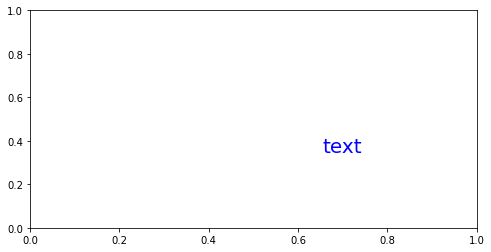

In [108]:
#绘制简单的文本图

#定义数据
x = np.random.rand(1)
y = np.random.rand(1)

#创建画布，并设定画布尺寸
plt.figure(figsize=(8,4))

#绘制图形
plt.text(x,y,'text'
         ,fontdict={'size':20,'color':'b'}
        );

【注意】plt.text()函数一次只能标注一个位置的文本~~~

#### **如果想一次添加多个文本怎么办呢？**
#### **写循环咯~~~~**

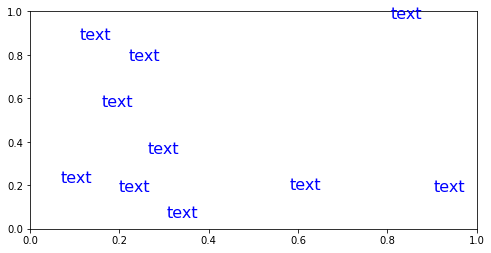

In [109]:
#创建画布
plt.figure(figsize=(8,4))

#绘制图形
for i in range(10):
    x = np.random.rand(1)
    y = np.random.rand(1)
    plt.text(x,y,'text',fontdict={'size':16,'color':'b'});

### 3. 绘制目标图像

#### 3.1 准备数据

In [114]:
# 准备数据
df = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mtcars.csv")  #导入数据集
x = df.loc[:, ['mpg']]   #提取目标数据
df['mpg_z'] = (x - x.mean())/x.std()  #对目标数据进行z-score标准化处理
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']] #生成颜色标签列
df.sort_values('mpg_z', inplace=True) #根据标准化后的数据对整个数据集进行排序
df.reset_index(inplace=True,drop=True) #重置数据集的索引

In [115]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


#### 3.2 绘制基础图形并添加文本信息

In [116]:
round(0.56666,2)

0.57

In [117]:
df.mpg_z.values

array([-1.82997917, -1.82997917, -1.19166439, -0.98804909, -0.90860438,
       -0.84972785, -0.8108034 , -0.8108034 , -0.75289375, -0.69554186,
       -0.58244884, -0.41662005, -0.32635469, -0.27280321, -0.16701545,
       -0.08014871, -0.08014871,  0.00559412,  0.22356336,  0.22356336,
        0.2892649 ,  0.2892649 ,  0.30559411,  0.51451502,  0.51451502,
        0.76363298,  1.00470849,  1.19516933,  1.63181012,  1.63181012,
        1.9017698 ,  2.0988105 ])

In [118]:
#保留两位小数
round(df.mpg_z.values[0],2)

-1.83

In [119]:
df.shape[0]

32

In [122]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red
5,3.872983,8,301.0,335,3.54,3.570,14.60,0,1,5,8,0,Maserati Bora,Maserati Bora,-0.849728,red
6,3.898718,8,275.8,180,3.07,3.780,18.00,0,0,3,3,0,Merc 450SLC,Merc 450SLC,-0.810803,red
7,3.898718,8,304.0,150,3.15,3.435,17.30,0,0,3,2,0,AMC Javelin,AMC Javelin,-0.810803,red
8,3.937004,8,318.0,150,2.76,3.520,16.87,0,0,3,2,0,Dodge Challenger,Dodge Challenger,-0.752894,red
9,3.974921,8,351.0,264,4.22,3.170,14.50,0,1,5,4,0,Ford Pantera L,Ford Pantera L,-0.695542,red


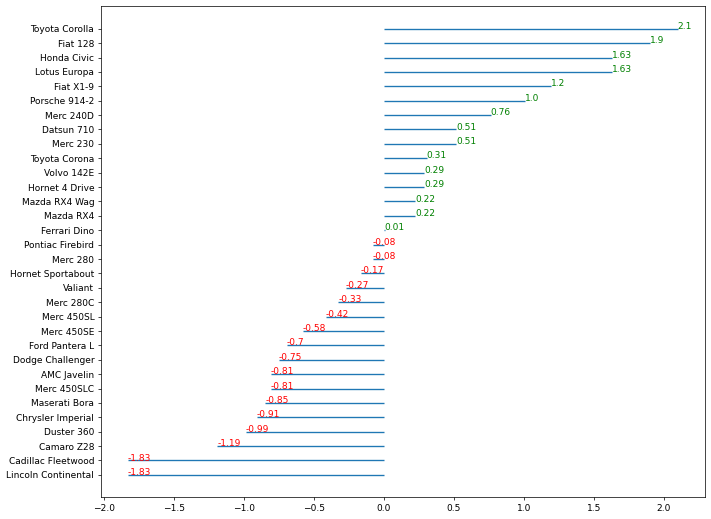

In [125]:
#创建画布
plt.figure(figsize=(12,10), dpi= 65)

#绘制基础图形
plt.hlines(y=df.cars, xmin=0, xmax=df.mpg_z)

#添加文本
for i in range(df.shape[0]):            #对每一条数据进行循环
    x = df.mpg_z[i]                     #获取一个x的值
    y = df.index[i]                     #获取一个y的值
    s = str(round(df.mpg_z[i],2))       #获取一个需要显示的文本，这里用了round函数，四舍五入保留两位小数
    plt.text(x,y,s,color=df.colors[i] ) #绘制简单的文本图

**这个基础图形有3个问题：**
- 文本信息都显示在线的上方，而我们需要的是显示在线条正对着的位置（中间）
- 红色文本显示在线条的右边，我们需要的是横坐标小于0的显示在左边，大于0的显示在右边
- 文本字体有点小

#### 3.3 修正文本信息

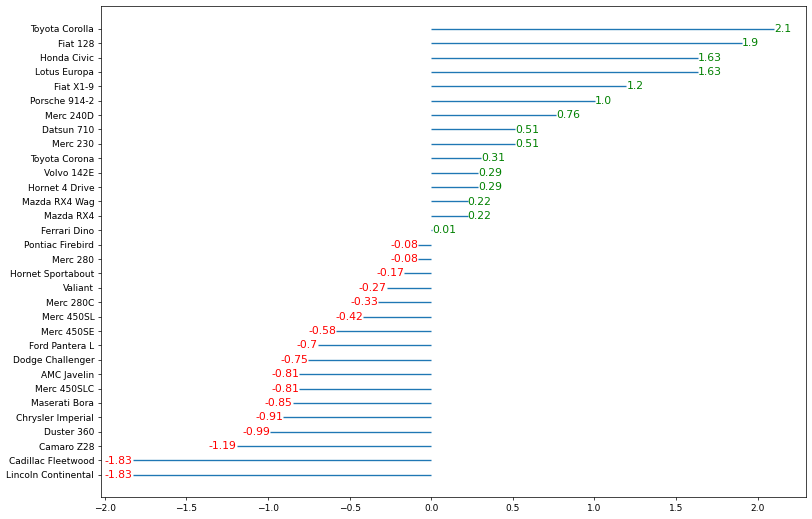

In [126]:
#创建画布
plt.figure(figsize=(14,10), dpi= 65)

#绘制基础图形
plt.hlines(y=df.cars, xmin=0, xmax=df.mpg_z)

#添加文本
for i in range(df.shape[0]):
    x = df.mpg_z[i]
    y = df.index[i]
    s = str(round(df.mpg_z[i],2))
    plt.text(x,y,s
             ,fontdict={'color':df.colors[i],'size':12}         #此处添加了颜色和尺寸，以字典的形式打包
             ,horizontalalignment='right' if x<0 else 'left'    #水平对齐参数，有left,right,center三种选择,指的是本文的哪一边与位置对齐
             ,verticalalignment='center'                        #垂直对齐参数，常用的有bottom,top,center三种选择
            )

这里需要说明的是：    
1. 水平对齐参数，用了类似于列表推导式的式子，不同的是这里只需要单个值不需要最后形成列表
2. 另外，left和right这两个对齐方式很容易混淆    
3. 以右对齐为例来说明：   
首先我们需要知道的是文本放置的位置点其实就是线条的末端   
所谓的右对齐就是要求文本的最右端要与这个位置点对齐

#### 3.4 添加装饰

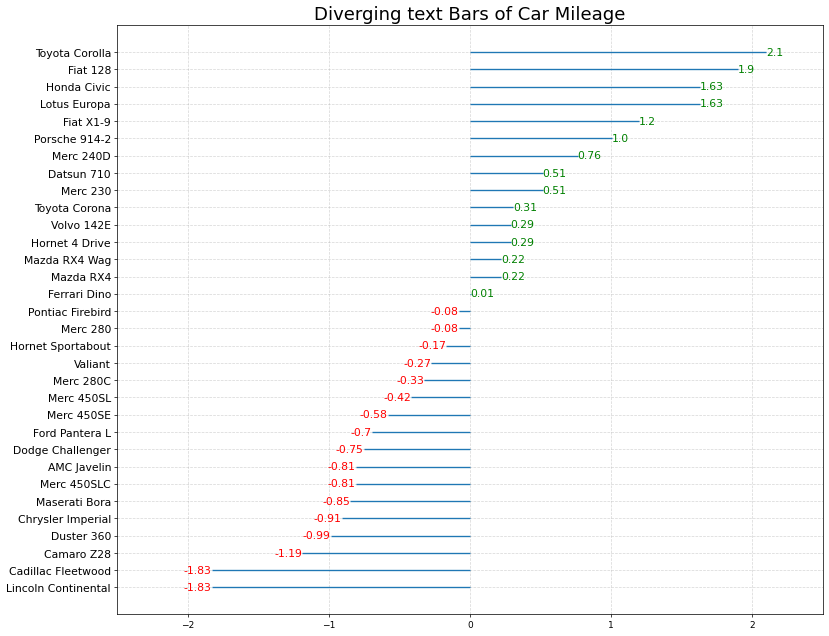

In [127]:
#创建画布
plt.figure(figsize=(14,12), dpi= 65)

#绘制基础图形
plt.hlines(y=df.cars, xmin=0, xmax=df.mpg_z)

#添加文本
for i in range(df.shape[0]):
    x = df.mpg_z[i]
    y = df.index[i]
    s = str(round(df.mpg_z[i],2))
    plt.text(x,y,s
             ,fontdict={'color':df.colors[i],'size':12}         #此处添加了颜色和尺寸，以字典的形式打包
             ,horizontalalignment='right' if x<0 else 'left'    #水平对齐参数，有left,right,center三种选择
             ,verticalalignment='center'                        #垂直对齐参数，有bottom,top,center三种选择
            )

#添加装饰
plt.yticks(fontsize=12)         #y轴刻度标签，并设置文字大小
plt.title('Diverging text Bars of Car Mileage', fontdict={'size':20}) #设置图形标题
plt.xlim(-2.5,2.5) #设定x轴的最大最小值
plt.grid(linestyle='--', alpha=0.5);  #配置网格线

### 4. 源码解读

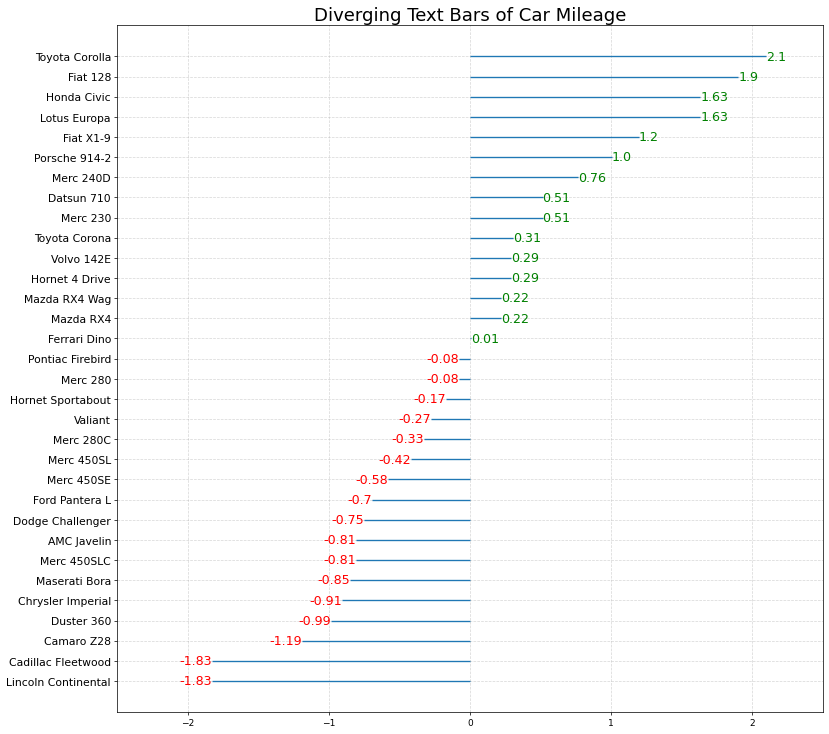

In [128]:
#这一整段都是原网站给出的代码

# Prepare Data
df = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mtcars.csv")   #导入原始数据集
x = df.loc[:, ['mpg']]               #提取目标数据 
df['mpg_z'] = (x - x.mean())/x.std() #对目标数据进行Z-score标准化处理
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']] #生成颜色标签列
df.sort_values('mpg_z', inplace=True)  #根据标准化之后的目标数据对整个数据集进行排序
df.reset_index(inplace=True)    #重置排序后的索引

# Draw plot
plt.figure(figsize=(14,14), dpi= 65)  #创建画布并设置画布尺寸
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z) #绘制发散型条形图

#绘制文本图
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z): 
    t = plt.text(x, y, round(tex, 2)        
                 , horizontalalignment='right' if x < 0 else 'left'
                 , verticalalignment='center'
                 , fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)  #添加y轴刻度标签，并设定文本大小
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20}) #添加图形标题
plt.grid(linestyle='--', alpha=0.5)  #配置网格线
plt.xlim(-2.5, 2.5)  #设定x轴最大最小值
plt.show() #显示图形

zip()函数解读：
- 这是一个压缩函数，返回一个zip对象   
- 其.__ next __（）方法返回一个元组，其中第i个元素来自第i个可迭代参数   
-  .__ next __（）方法一直持续到参数序列中最短的那一列元素耗尽，然后它引发StopIteration（也就是停止迭代）。


In [129]:
zip([1,2,3],['a','b','c','d'],[2,3,4,5,6])

In [130]:
a = zip([1,2,3],['a','b','c','d'],[2,3,4,5,6])

In [131]:
a.__next__()

(1, 'a', 2)

In [132]:
a.__next__()

(2, 'b', 3)

In [133]:
a.__next__()

(3, 'c', 4)

In [134]:
#若要查看压缩包中所有的元素，可以用[*]的方式解压缩
[*zip([1,2,3],['a','b','c','d'],[2,3,4,5,6])]

[(1, 'a', 2), (2, 'b', 3), (3, 'c', 4)]

In [135]:
#打开代码中的zip包
[*zip(df.mpg_z, df.index, df.mpg_z)]

[(-1.8299791661720348, 0, -1.8299791661720348),
 (-1.8299791661720348, 1, -1.8299791661720348),
 (-1.191664392938456, 2, -1.191664392938456),
 (-0.9880490925406551, 3, -0.9880490925406551),
 (-0.9086043848420455, 4, -0.9086043848420455),
 (-0.8497278530288042, 5, -0.8497278530288042),
 (-0.8108033966920296, 6, -0.8108033966920296),
 (-0.8108033966920296, 7, -0.8108033966920296),
 (-0.752893751851097, 8, -0.752893751851097),
 (-0.6955418632876929, 9, -0.6955418632876929),
 (-0.5824488394660823, 10, -0.5824488394660823),
 (-0.41662004701256034, 11, -0.41662004701256034),
 (-0.32635468813636953, 12, -0.32635468813636953),
 (-0.2728032088912669, 13, -0.2728032088912669),
 (-0.16701544823774078, 14, -0.16701544823774078),
 (-0.08014871317057487, 15, -0.08014871317057487),
 (-0.08014871317057487, 16, -0.08014871317057487),
 (0.0055941187568688405, 17, 0.0055941187568688405),
 (0.22356335588723736, 18, 0.22356335588723736),
 (0.22356335588723736, 19, 0.22356335588723736),
 (0.2892648952458932

In [136]:
b = [*zip(df.mpg_z, df.index, df.mpg_z)]

In [137]:
b[2]

(-1.191664392938456, 2, -1.191664392938456)

In [138]:
# 也可以用循环的方式打开
for x,y,z in zip(df.mpg_z, df.index, df.mpg_z):
    print(x,y,z)

-1.8299791661720348 0 -1.8299791661720348
-1.8299791661720348 1 -1.8299791661720348
-1.191664392938456 2 -1.191664392938456
-0.9880490925406551 3 -0.9880490925406551
-0.9086043848420455 4 -0.9086043848420455
-0.8497278530288042 5 -0.8497278530288042
-0.8108033966920296 6 -0.8108033966920296
-0.8108033966920296 7 -0.8108033966920296
-0.752893751851097 8 -0.752893751851097
-0.6955418632876929 9 -0.6955418632876929
-0.5824488394660823 10 -0.5824488394660823
-0.41662004701256034 11 -0.41662004701256034
-0.32635468813636953 12 -0.32635468813636953
-0.2728032088912669 13 -0.2728032088912669
-0.16701544823774078 14 -0.16701544823774078
-0.08014871317057487 15 -0.08014871317057487
-0.08014871317057487 16 -0.08014871317057487
0.0055941187568688405 17 0.0055941187568688405
0.22356335588723736 18 0.22356335588723736
0.22356335588723736 19 0.22356335588723736
0.28926489524589327 20 0.28926489524589327
0.28926489524589327 21 0.28926489524589327
0.30559410994288183 22 0.30559410994288183
0.514515017